<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/renewable_energy/blob/main/renewable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

In [5]:
df = pd.read_csv('/content/drive/MyDrive/재생에너지/renewable_energy.csv')
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,RENEWABLE,TOT,KTOE,A,1960,4436.932,NaN
1,AUS,RENEWABLE,TOT,KTOE,A,1961,4490.510,NaN
2,AUS,RENEWABLE,TOT,KTOE,A,1962,4407.097,NaN
3,AUS,RENEWABLE,TOT,KTOE,A,1963,4628.738,NaN
4,AUS,RENEWABLE,TOT,KTOE,A,1964,4497.396,NaN
...,...,...,...,...,...,...,...,...
15899,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2011,8.150,NaN
15900,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2012,8.710,NaN
15901,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2013,9.160,NaN
15902,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2014,9.380,NaN


Renewable Energy Production Over Time by Country (Top 20)

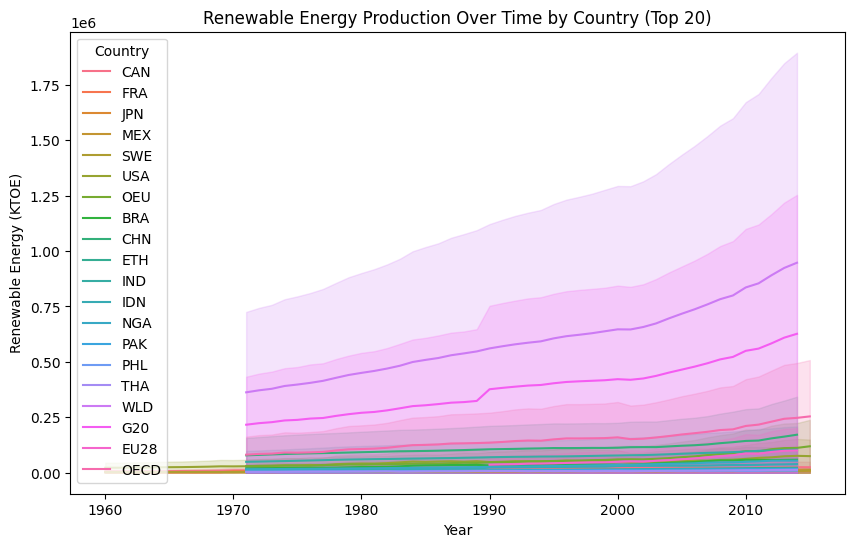

In [6]:
# Filter the dataset for the top 20 countries by renewable energy production
top_20_countries = df.groupby('LOCATION')['Value'].sum().nlargest(20).index
df_filtered = df[df['LOCATION'].isin(top_20_countries)]

# Line Plot by Country
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='TIME', y='Value', hue='LOCATION')
plt.title('Renewable Energy Production Over Time by Country (Top 20)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (KTOE)')
plt.legend(title='Country')
plt.show()


Renewable Energy (KTOE)

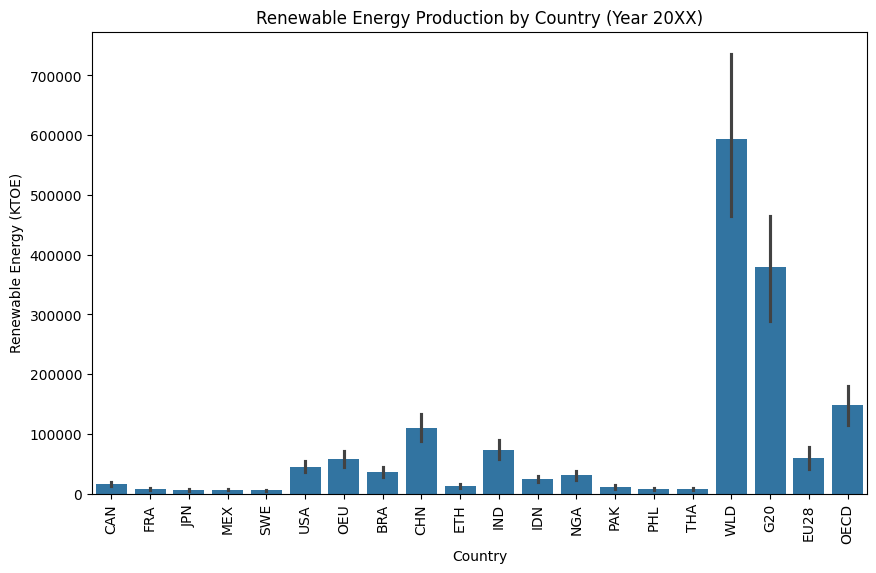

In [7]:
#  Bar Plot by Country
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='LOCATION', y='Value')
plt.title('Renewable Energy Production by Country (Year 20XX)')
plt.xlabel('Country')
plt.ylabel('Renewable Energy (KTOE)')
plt.xticks(rotation=90)
plt.show()



Renewable Energy Production by Country and Source (Year 2010)
- try with other year

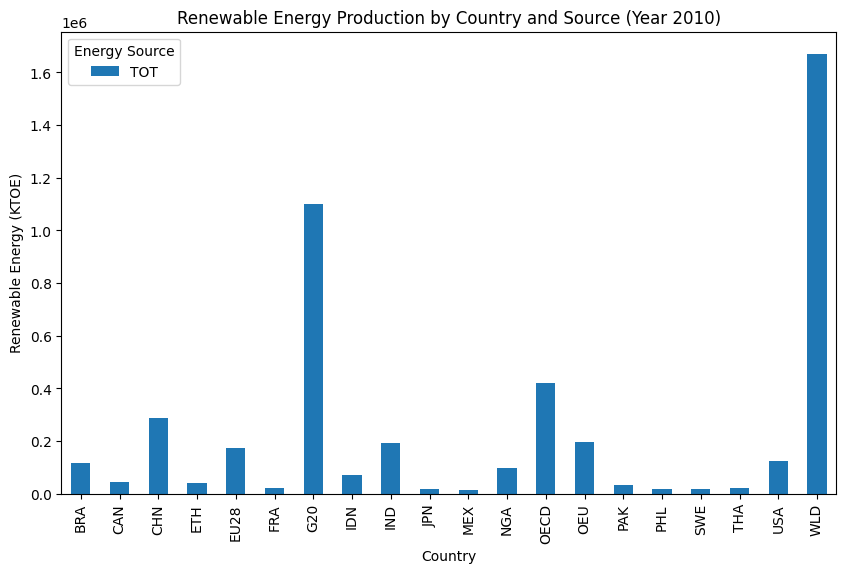

In [8]:
#  Stacked Bar Plot by Country and Energy Source (Year 2010)
# Replace '20XX' with the specific year you want to analyze
df_source = df_filtered[df_filtered['TIME'] == 2010].groupby(['LOCATION', 'SUBJECT'])['Value'].sum().unstack() # change 2010
df_source.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Renewable Energy Production by Country and Source (Year 2010)')
plt.xlabel('Country')
plt.ylabel('Renewable Energy (KTOE)')
plt.xticks(rotation=90)
plt.legend(title='Energy Source')
plt.show()



Renewable Energy Production Scatter Plot Over Years


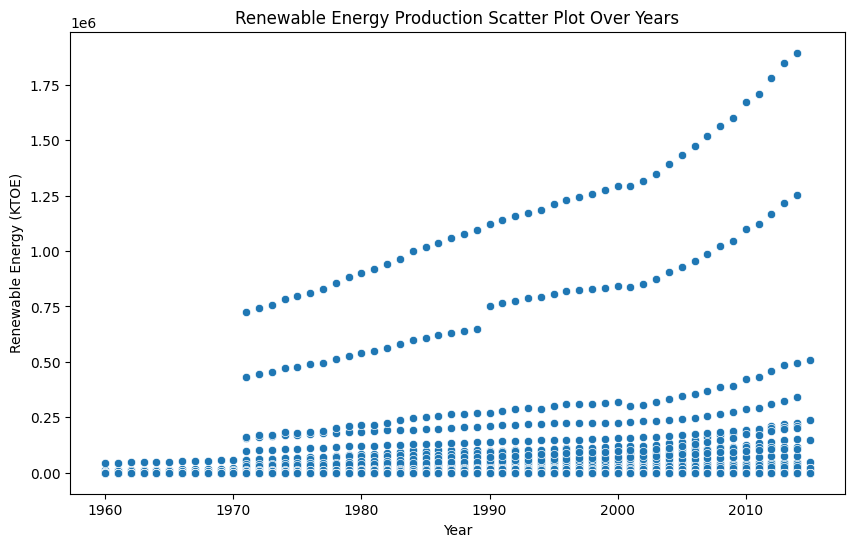

In [9]:
#  Scatter Plot by Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='TIME', y='Value')
plt.title('Renewable Energy Production Scatter Plot Over Years')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (KTOE)')
plt.show()




Renewable Energy Production by Country (Year 2010)

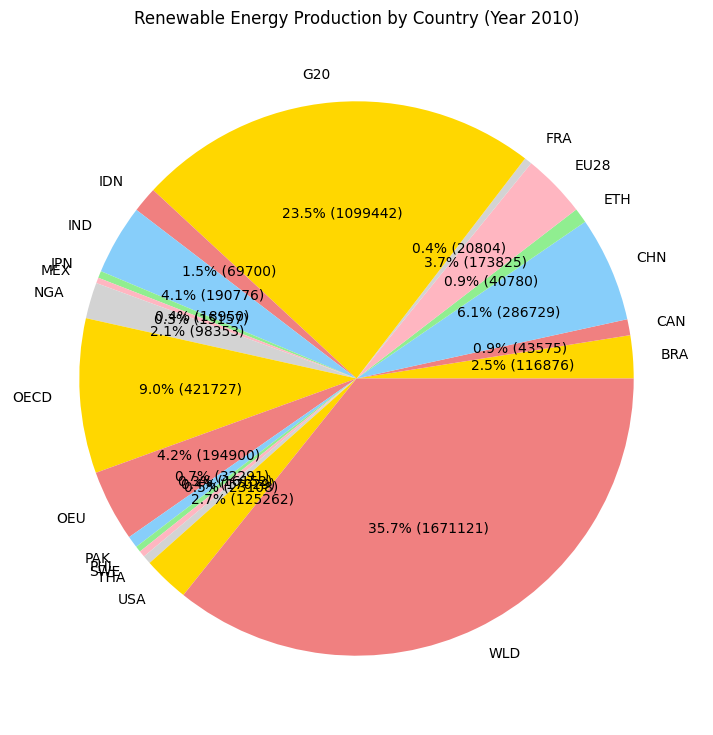

In [10]:
# Pie Chart by Country (Year 2010)
# Replace '20XX' with the specific year you want to analyze
df_pie = df_filtered[df_filtered['TIME'] == 2010].groupby('LOCATION')['Value'].sum()
plt.figure(figsize=(9, 9))

# Define custom colors for the pie chart
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightgray']

# Create the pie chart with labels, percentages, and custom colors
plt.pie(df_pie, labels=df_pie.index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df_pie) / 100), colors=colors)

plt.title('Renewable Energy Production by Country (Year 2010)')
plt.show()





Renewable Energy Production Distribution by Country

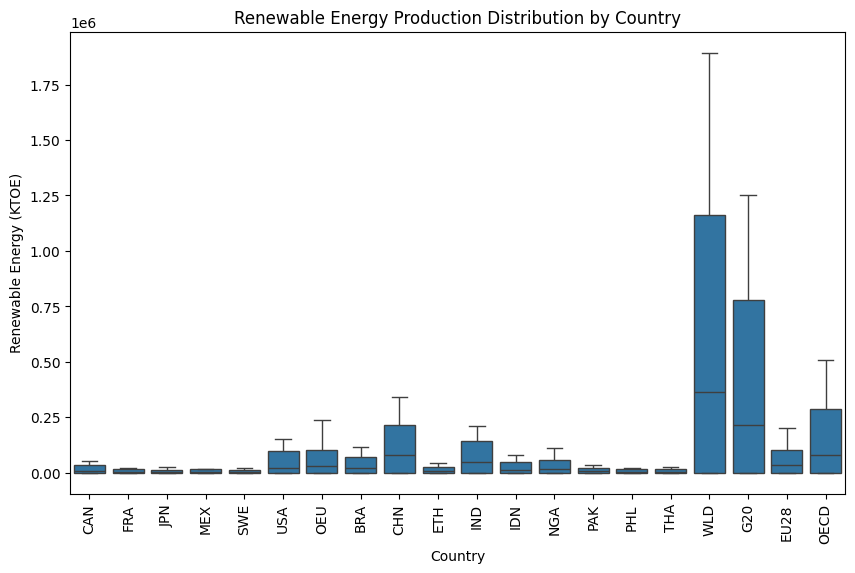

In [11]:
#  Box Plot by Country
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='LOCATION', y='Value')
plt.title('Renewable Energy Production Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Renewable Energy (KTOE)')
plt.xticks(rotation=90)
plt.show()



Renewable Energy Production Heatmap by Country and Year

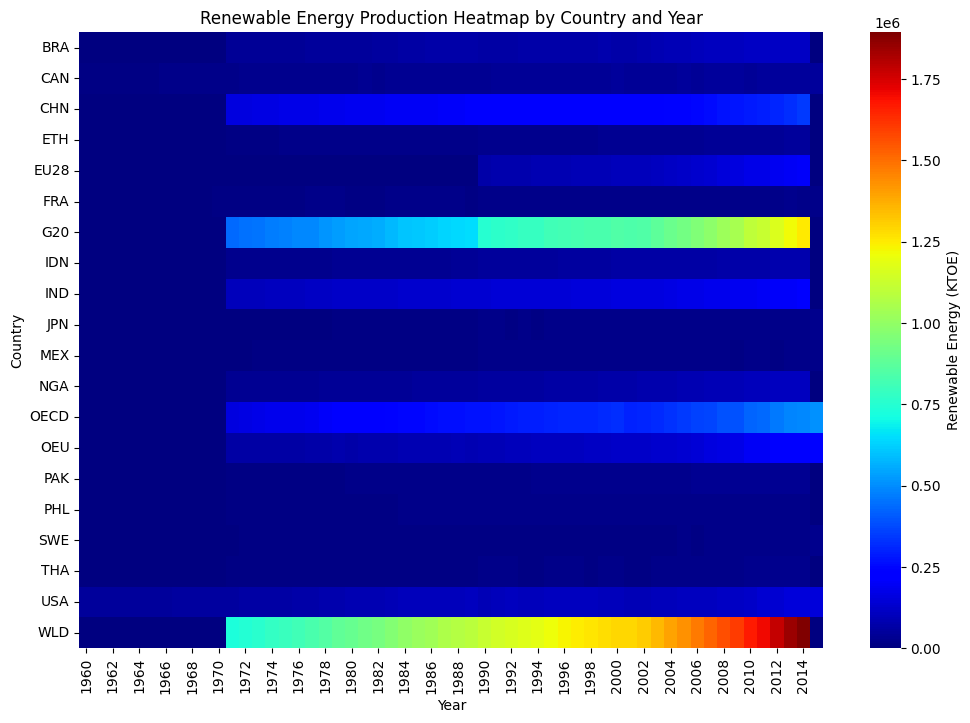

In [12]:
#  Heatmap by Country and Year
df_heatmap = df_filtered.pivot_table(index='LOCATION', columns='TIME', values='Value', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, cmap='jet', cbar_kws={'label': 'Renewable Energy (KTOE)'})
plt.title('Renewable Energy Production Heatmap by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


Renewable Energy Production Choropleth Map by Country and Year

In [13]:
import plotly.express as px

# Crear el gráfico Choropleth
fig = px.choropleth(df,
                    locations='LOCATION',
                    locationmode='ISO-3',
                    color='Value',
                    hover_name='LOCATION',
                    animation_frame='TIME',
                    title='Renewable Energy Production Choropleth Map by Country and Year ',
                    color_continuous_scale='algae')  # Cambiar 'Viridis' a la paleta de colores que desees

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True)

fig.show()
